# Import Libraries

In [90]:
import pandas as pd

In [91]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Data

In [92]:
data = pd.read_csv('/content/drive/MyDrive/thesis/CSV202410DatasetEVOfficeParking_v0-2.csv')

In [93]:
data.shape

(55379, 14)

In [94]:
data.isna().sum()

,0
EV_id_x,0
start_datetime,0
end_datetime,0
total_energy,0
rail,0
evse_uid,0
channel,0
capacity_kwh,51550
commute_km_range_min,51326
commute_km_range_max,51326


Due to the high percentage of missing values, we initially explored removing the survey-based features from the dataset. However, experimental results demonstrated that models trained with these features achieved better performance, particularly with respect to mean absolute error (MAE). As a result, we chose to retain the survey data to preserve the predictive strength of the models, despite the associated missingness.

In [95]:
data = data.dropna(axis = 0)

In [96]:
data.shape

(3829, 14)

# EDA

In [97]:
data.columns

Index(['EV_id_x', 'start_datetime', 'end_datetime', 'total_energy', 'rail',
       'evse_uid', 'channel', 'capacity_kwh', 'commute_km_range_min',
       'commute_km_range_max', 'EV_brand_selfreported',
       'EV_model_selfreported', 'capacity_kwh_selfreported', 'ownership'],
      dtype='object')

In [98]:
data.head()

,EV_id_x,start_datetime,end_datetime,total_energy,rail,evse_uid,channel,capacity_kwh,commute_km_range_min,commute_km_range_max,EV_brand_selfreported,EV_model_selfreported,capacity_kwh_selfreported,ownership
77,EV15,2020-10-14 13:54:29,2020-10-14 15:44:16,"20,014",mennekes,600006,1,64.0,21.0,40.0,Hyundai,Kona,64kw,Door werkgever geleased
78,EV15,2020-10-16 14:05:12,2020-10-16 15:43:25,"17,887",mennekes,600000,1,64.0,21.0,40.0,Hyundai,Kona,64kw,Door werkgever geleased
79,EV15,2020-10-30 13:30:54,2020-10-30 15:10:54,"18,241",mennekes,600005,1,64.0,21.0,40.0,Hyundai,Kona,64kw,Door werkgever geleased
81,EV15,2020-11-04 14:18:57,2020-11-04 16:01:28,"18,663",mennekes,600005,1,64.0,21.0,40.0,Hyundai,Kona,64kw,Door werkgever geleased
85,EV15,2020-11-13 14:58:38,2020-11-13 16:37:52,18.11,mennekes,600005,1,64.0,21.0,40.0,Hyundai,Kona,64kw,Door werkgever geleased


In [99]:
data.dtypes

,0
EV_id_x,object
start_datetime,object
end_datetime,object
total_energy,object
rail,object
evse_uid,int64
channel,int64
capacity_kwh,float64
commute_km_range_min,float64
commute_km_range_max,float64


In [100]:
data["channel"].value_counts()

,count
channel,
2,2040
1,1789


In [101]:
data["EV_id_x"].value_counts()

,count
EV_id_x,
EV273,292
EV537,237
EV74,236
EV215,233
EV149,207
EV114,183
EV620,155
EV560,146
EV178,145


In [102]:
data["rail"].value_counts()

,count
rail,
E,1655
B,649
H,566
C,388
M,248
J,131
K,95
L,52
mennekes,36


About 'Rail' column:
* Employee Parking Deck : The main area where employees park their cars. It’s powered by several electricity rails (named Rails B, C, E, H, J, K, M, L). About 250 charging points are installed there.
* MENNEKES Chargers : These are a special set of chargers, mostly used by managers. 22 chargers are located in the "charging pit" where managers park, and 1 charger is at facility management. (Mennekes is just the brand name of the charger.)
* Shared Cars Area : Charging points for shared company cars. There are about 6 charging points specifically for shared cars, 2 more for general employee use, and 2 for facility management.
* Visitor Parking : This is the front parking area meant for visitors. It includes a "big carport" and a "small carport" (carports are covered parking spots). There are 26 regular visitor spots and 2 accessible (disabled) parking spots.

In [103]:
data["evse_uid"].value_counts()

,count
evse_uid,
1802658,316
1802521,152
1802637,139
1802663,132
1802674,127
...,...
1000122806,1
1000122973,1
1000122813,1


In [104]:
data['capacity_kwh_selfreported'].value_counts()

,count
capacity_kwh_selfreported,
79KW,292
50 Kwh,237
12 KWH,236
10kw,233
74 kwh,207
80kWh,184
40 km,183
"8,9 kWh",146
58kWh,145


Due to its inconsistent formatting, mixed units (kWh, km), and heavy free-text input, the capacity_kwh_selfreported column was excluded from the final modeling dataset. Instead, we relied on the cleaner and more structured capacity_kwh feature for predicting session duration.

In [105]:
data.drop(columns=['capacity_kwh_selfreported'], inplace=True)

In [106]:
data['EV_brand_selfreported'].value_counts()

,count
EV_brand_selfreported,
Tesla,651
Volkswagen,559
BMW,460
Volvo,452
Kia,294
Polestar,292
VW,143
Skoda,131
Volkswagen,127


In [107]:
data['EV_model_selfreported'].value_counts()

,count
EV_model_selfreported,
Model 3,537
2,338
ID3,288
V60 T6 Recharge,236
Passat,233
IX3,207
CX40,183
iX-3,155
Xceed,146


In [108]:
# Group by Brand and Model, and count how many times each combination appears
brand_model_counts = data.groupby(['EV_brand_selfreported', 'EV_model_selfreported']).size().reset_index(name='count')

# Sort by Brand and count (for easier reading)
brand_model_counts = brand_model_counts.sort_values(by=['EV_brand_selfreported', 'count'], ascending=[True, False])

# Display it
brand_model_counts


,EV_brand_selfreported,EV_model_selfreported,count
0,Audi A3 etron,Hybride,15
1,Aydi,Q4 40 Etron,82
3,BMW,IX3,207
5,BMW,iX-3,155
2,BMW,I3,84
4,BMW,X1xDrive25e (hybride),14
6,BMw,iX3,29
7,Ford,Kuga PHEV 2021,56
8,Ford,Mustang Mach-E,38
9,Hyundai,Kona,56


In [109]:
# First: fix 'Hybride' model and brand for VW Passat GTE
data.loc[
    (data['EV_brand_selfreported'] == 'VW Passat GTE') &
    (data['EV_model_selfreported'] == 'Hybride'),
    'EV_model_selfreported'
] = 'Passat'

data.loc[
    (data['EV_brand_selfreported'] == 'VW Passat GTE'),
    'EV_brand_selfreported'
] = 'Volkswagen'

# Then: fix 'Hybride' model and brand for Audi A3 etron
data.loc[
    (data['EV_brand_selfreported'] == 'Audi A3 etron') &
    (data['EV_model_selfreported'] == 'Hybride'),
    'EV_model_selfreported'
] = 'A3 e-tron'

data.loc[
    (data['EV_brand_selfreported'] == 'Audi A3 etron'),
    'EV_brand_selfreported'
] = 'Audi'


In [110]:
# Fix Nissan Leaf + model 2018 issue
data.loc[
    (data['EV_brand_selfreported'] == 'Nissan Leaf') &
    (data['EV_model_selfreported'] == '2018'),
    'EV_model_selfreported'
] = 'Leaf'

data.loc[
    (data['EV_brand_selfreported'] == 'Nissan Leaf') &
    (data['EV_model_selfreported'] == 'Leaf'),
    'EV_brand_selfreported'
] = 'Nissan'


In [111]:
# Group by Brand and Model, and count how many times each combination appears
brand_model_counts = data.groupby(['EV_brand_selfreported', 'EV_model_selfreported']).size().reset_index(name='count')

# Sort by Brand and count (for easier reading)
brand_model_counts = brand_model_counts.sort_values(by=['EV_brand_selfreported', 'count'], ascending=[True, False])

# Display it
brand_model_counts


,EV_brand_selfreported,EV_model_selfreported,count
0,Audi,A3 e-tron,15
1,Aydi,Q4 40 Etron,82
3,BMW,IX3,207
5,BMW,iX-3,155
2,BMW,I3,84
4,BMW,X1xDrive25e (hybride),14
6,BMw,iX3,29
7,Ford,Kuga PHEV 2021,56
8,Ford,Mustang Mach-E,38
9,Hyundai,Kona,56


In [112]:
# Fix brand names
brand_mapping = {
    'Aydi': 'Audi',
    'BMw': 'BMW',
    'Tesla en (andere auto is ook een) Tesla': 'Tesla',
    'VW': 'Volkswagen'
}

# Fix model names
model_mapping = {
    'iX-3': 'iX3',
    'IX3': 'iX3',
    'Model3': 'Model 3',
    'Model 3 standard range +': 'Model 3',
    'Model S-75D en Model 3-Long range': None,  # Too messy, drop
    'ID.3 150 kW/58 kWh 1St Plus automaat': 'ID3',
    'CX40': 'XC40',
    'XC 40': 'XC40',
    'XC40 Hybride': 'XC40',
    'E-niro': 'Niro'
}

# Apply the mappings
data['EV_brand_selfreported'] = data['EV_brand_selfreported'].replace(brand_mapping)
data['EV_model_selfreported'] = data['EV_model_selfreported'].replace(model_mapping)

# Finally, drop any rows where model is still missing after cleaning
data = data.dropna(subset=['EV_model_selfreported'])


In [113]:
# Clean brand names: strip spaces, fix casing
data['EV_brand_selfreported'] = data['EV_brand_selfreported'].str.strip().str.title()

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [114]:
# Group by Brand and Model, and count how many times each combination appears
brand_model_counts = data.groupby(['EV_brand_selfreported', 'EV_model_selfreported']).size().reset_index(name='count')

# Sort by Brand and count (for easier reading)
brand_model_counts = brand_model_counts.sort_values(by=['EV_brand_selfreported', 'count'], ascending=[True, False])

# Display it
brand_model_counts

,EV_brand_selfreported,EV_model_selfreported,count
1,Audi,Q4 40 Etron,82
0,Audi,A3 e-tron,15
4,Bmw,iX3,391
2,Bmw,I3,84
3,Bmw,X1xDrive25e (hybride),14
5,Ford,Kuga PHEV 2021,56
6,Ford,Mustang Mach-E,38
7,Hyundai,Kona,56
8,Kia,Niro,148
9,Kia,Xceed,146


Brand and model fields were standardized by correcting typos, abbreviations, and inconsistent survey inputs. For example, "Aydi" was mapped to "Audi", "VW" to "Volkswagen", and different variations of the "Model 3" were unified. Non-standard model entries such as "Hybride" and "2018" were resolved based on brand context or removed if ambiguity persisted. Duplicate brand–model entries were merged to create a clean and consistent dataset for modeling.

In [115]:
data.shape

(3720, 13)

We reviewed the EV_model_selfreported column and found that several entries referred to the same vehicle model but were inconsistently labeled (e.g., "Model3" vs. "Model 3", "iX-3" vs. "iX3"). To ensure consistent feature quality, we merged similar entries into unified categories. Non-informative entries, such as "2018" (a year) and "Hybride" (a generic label), were mapped to an "Unknown" category to avoid introducing noise. This cleaning step allowed us to retain valuable model information while minimizing ambiguity in the dataset.

In [116]:
data['EV_brand_selfreported'].value_counts()

,count
EV_brand_selfreported,
Volkswagen,956
Tesla,651
Bmw,489
Volvo,452
Polestar,338
Kia,294
Skoda,131
Audi,97
Ford,94


In [117]:
data['ownership'].value_counts()

,count
ownership,
Door werkgever geleased,2567
Gekocht,1008
Privaat geleased,145


In [118]:
data['total_energy'] = (
    data['total_energy']
    .astype(str)
        # remove thousands dots (if any)
    .str.replace(',', '.', regex=False)    # replace decimal commas with dots
    .astype(float)
)
data['evse_uid'] = data['evse_uid'].astype(str)

The total_energy field was standardized by converting all decimal commas to periods and casting the values to float format. The evse_uid column, representing charger identifiers, was cast to string type to ensure categorical processing, as these IDs do not possess any inherent numerical meaning.

In [119]:
data.describe()

,total_energy,channel,capacity_kwh,commute_km_range_min,commute_km_range_max
count,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000
mean,21.518434,1.531183,48.944785,37.259409,61.137097
std,15.860613,0.499094,30.073672,22.325085,34.870367
min,1.070000,1.000000,6.000000,0.000000,20.000000
25%,8.267750,1.000000,12.000000,21.000000,40.000000
50%,16.814500,2.000000,58.000000,41.000000,60.000000
75%,31.895000,2.000000,75.000000,61.000000,80.000000
max,76.980000,2.000000,125.000000,81.000000,170.000000


In [120]:
data.dtypes

,0
EV_id_x,object
start_datetime,object
end_datetime,object
total_energy,float64
rail,object
evse_uid,object
channel,int64
capacity_kwh,float64
commute_km_range_min,float64
commute_km_range_max,float64


In [121]:
data.head()

,EV_id_x,start_datetime,end_datetime,total_energy,rail,evse_uid,channel,capacity_kwh,commute_km_range_min,commute_km_range_max,EV_brand_selfreported,EV_model_selfreported,ownership
77,EV15,2020-10-14 13:54:29,2020-10-14 15:44:16,20.014,mennekes,600006,1,64.0,21.0,40.0,Hyundai,Kona,Door werkgever geleased
78,EV15,2020-10-16 14:05:12,2020-10-16 15:43:25,17.887,mennekes,600000,1,64.0,21.0,40.0,Hyundai,Kona,Door werkgever geleased
79,EV15,2020-10-30 13:30:54,2020-10-30 15:10:54,18.241,mennekes,600005,1,64.0,21.0,40.0,Hyundai,Kona,Door werkgever geleased
81,EV15,2020-11-04 14:18:57,2020-11-04 16:01:28,18.663,mennekes,600005,1,64.0,21.0,40.0,Hyundai,Kona,Door werkgever geleased
85,EV15,2020-11-13 14:58:38,2020-11-13 16:37:52,18.110,mennekes,600005,1,64.0,21.0,40.0,Hyundai,Kona,Door werkgever geleased


In [122]:
data.dtypes

,0
EV_id_x,object
start_datetime,object
end_datetime,object
total_energy,float64
rail,object
evse_uid,object
channel,int64
capacity_kwh,float64
commute_km_range_min,float64
commute_km_range_max,float64


In [123]:
data['total_energy'].value_counts()

,count
total_energy,
9.080,10
9.170,9
9.190,8
9.010,7
7.940,7
...,...
18.821,1
17.790,1
26.540,1


In [124]:
data["start_datetime"] = pd.to_datetime(
    data["start_datetime"], errors="coerce", dayfirst=True
)

data["end_datetime"] = pd.to_datetime(
    data["end_datetime"], errors="coerce", dayfirst=True
)

In [125]:
data.dtypes

,0
EV_id_x,object
start_datetime,datetime64[ns]
end_datetime,datetime64[ns]
total_energy,float64
rail,object
evse_uid,object
channel,int64
capacity_kwh,float64
commute_km_range_min,float64
commute_km_range_max,float64


In [126]:
data["duration_minutes"] = (data["end_datetime"] - data["start_datetime"]).dt.total_seconds() / 60


In [127]:
data["duration_minutes"].max()

868.6

In [128]:
data['transaction_date'] = pd.to_datetime(data['start_datetime'].dt.date)

data['transaction_year'] = data['start_datetime'].dt.year

data['transaction_month'] = data['start_datetime'].dt.month

data['transaction_day'] = data['start_datetime'].dt.day

data['transaction_hour'] = data['start_datetime'].dt.hour

In [129]:
data.dtypes

,0
EV_id_x,object
start_datetime,datetime64[ns]
end_datetime,datetime64[ns]
total_energy,float64
rail,object
evse_uid,object
channel,int64
capacity_kwh,float64
commute_km_range_min,float64
commute_km_range_max,float64


In [130]:
data['transaction_week_day'] = data['transaction_date'].dt.weekday
data['weekend'] = data['transaction_week_day'].apply(lambda x: True if x == 5 or x == 6 else False)


In [131]:
import holidays

# Load Netherlands holidays
nl_holidays = holidays.Netherlands(years=[2020,2021,2022, 2023, 2024])


In [132]:
from datetime import timedelta

# Day before holiday
data["is_day_before_holiday"] = data["transaction_date"].apply(
    lambda x: (x + timedelta(days=1)) in nl_holidays
)

# Day after holiday
data["is_day_after_holiday"] = data["transaction_date"].apply(
    lambda x: (x - timedelta(days=1)) in nl_holidays
)

In [133]:
data.head()

,EV_id_x,start_datetime,end_datetime,total_energy,rail,evse_uid,channel,capacity_kwh,commute_km_range_min,commute_km_range_max,...,duration_minutes,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour,transaction_week_day,weekend,is_day_before_holiday,is_day_after_holiday
77,EV15,2020-10-14 13:54:29,2020-10-14 15:44:16,20.014,mennekes,600006,1,64.0,21.0,40.0,...,109.783333,2020-10-14,2020,10,14,13,2,False,False,False
78,EV15,2020-10-16 14:05:12,2020-10-16 15:43:25,17.887,mennekes,600000,1,64.0,21.0,40.0,...,98.216667,2020-10-16,2020,10,16,14,4,False,False,False
79,EV15,2020-10-30 13:30:54,2020-10-30 15:10:54,18.241,mennekes,600005,1,64.0,21.0,40.0,...,100.000000,2020-10-30,2020,10,30,13,4,False,False,False
81,EV15,2020-11-04 14:18:57,2020-11-04 16:01:28,18.663,mennekes,600005,1,64.0,21.0,40.0,...,102.516667,2020-11-04,2020,11,4,14,2,False,False,False
85,EV15,2020-11-13 14:58:38,2020-11-13 16:37:52,18.110,mennekes,600005,1,64.0,21.0,40.0,...,99.233333,2020-11-13,2020,11,13,14,4,False,False,False


# Weather data

In [134]:
!pip install meteostat


In [135]:
from datetime import datetime
from meteostat import Point, Daily

# Set time period
start = datetime(2021, 1, 1)
end = datetime(2024, 12, 31)


In [136]:
# Utrecht coordinates: 52.0907° N, 5.1214° E
utrecht = Point(52.0907, 5.1214)

In [137]:
# Get daily data
weather_data = Daily(utrecht, start, end)
weather_data = weather_data.fetch()


In [138]:
weather_data.isna().sum()

,0
tavg,0
tmin,0
tmax,0
prcp,0
snow,32
wdir,0
wspd,0
wpgt,12
pres,0
tsun,1461


In [139]:
weather_data.describe()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
count,1461.000000,1461.000000,1461.000000,1461.000000,1429.000000,1461.000000,1461.000000,1449.000000,1461.000000,0.0
mean,11.370773,7.036071,15.400958,2.687269,0.685794,188.067762,12.063107,30.745342,1015.324504,NaN
std,5.934399,5.453175,6.967710,5.179626,6.488943,92.469426,4.911620,10.817374,10.258805,NaN
min,-6.500000,-10.900000,-4.800000,0.000000,0.000000,0.000000,2.600000,9.300000,976.400000,NaN
25%,7.000000,3.000000,10.100000,0.000000,0.000000,124.000000,8.400000,22.200000,1009.000000,NaN
50%,11.100000,7.400000,15.300000,0.100000,0.000000,204.000000,11.300000,29.600000,1015.800000,NaN
75%,16.300000,11.300000,21.000000,3.100000,0.000000,247.000000,14.700000,37.000000,1022.300000,NaN
max,26.400000,19.400000,35.500000,53.300000,100.000000,359.000000,31.700000,90.800000,1042.500000,NaN


* Snowfall is rare in Utrecht, and missing likely means "no snow". Fill missing values with 0
* wpgt: Fill missing values with median or mean. Because gusts vary but filling with 0 would be unrealistic.
* tsun: Drop the column. Completely missing, no usable data.



In [140]:
weather_data.drop(columns=['tsun'], inplace=True)

In [141]:
# Fill snow with 0 (no snow recorded)
weather_data['snow'].fillna(0, inplace=True)

# Fill wpgt (gusts) with the average wind speed
weather_data['wpgt'].fillna(weather_data['wspd'], inplace=True)


The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [142]:
weather_data.isna().sum()

,0
tavg,0
tmin,0
tmax,0
prcp,0
snow,0
wdir,0
wspd,0
wpgt,0
pres,0


In [143]:
weather_data.dtypes

,0
tavg,float64
tmin,float64
tmax,float64
prcp,float64
snow,float64
wdir,float64
wspd,float64
wpgt,float64
pres,float64


In [144]:
weather_data.describe()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,11.370773,7.036071,15.400958,2.687269,0.670773,188.067762,12.063107,30.594182,1015.324504
std,5.934399,5.453175,6.967710,5.179626,6.418223,92.469426,4.911620,10.902566,10.258805
min,-6.500000,-10.900000,-4.800000,0.000000,0.000000,0.000000,2.600000,7.300000,976.400000
25%,7.000000,3.000000,10.100000,0.000000,0.000000,124.000000,8.400000,22.200000,1009.000000
50%,11.100000,7.400000,15.300000,0.100000,0.000000,204.000000,11.300000,29.600000,1015.800000
75%,16.300000,11.300000,21.000000,3.100000,0.000000,247.000000,14.700000,37.000000,1022.300000
max,26.400000,19.400000,35.500000,53.300000,100.000000,359.000000,31.700000,90.800000,1042.500000


# Merge Data

In [145]:
data_no_weather = data.copy()

In [146]:
data_no_weather['date'] = data_no_weather['transaction_date']

In [147]:
weather_data.reset_index(inplace=True)
weather_data['date'] = weather_data['time']

In [148]:
data_with_weather = pd.merge(data_no_weather, weather_data, on='date', how='left')

In [149]:
data_with_weather.columns

Index(['EV_id_x', 'start_datetime', 'end_datetime', 'total_energy', 'rail',
       'evse_uid', 'channel', 'capacity_kwh', 'commute_km_range_min',
       'commute_km_range_max', 'EV_brand_selfreported',
       'EV_model_selfreported', 'ownership', 'duration_minutes',
       'transaction_date', 'transaction_year', 'transaction_month',
       'transaction_day', 'transaction_hour', 'transaction_week_day',
       'weekend', 'is_day_before_holiday', 'is_day_after_holiday', 'date',
       'time', 'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt',
       'pres'],
      dtype='object')

In [150]:
data_with_weather.drop(columns=['date', 'time'], inplace=True)

In [151]:
data_with_weather.columns

Index(['EV_id_x', 'start_datetime', 'end_datetime', 'total_energy', 'rail',
       'evse_uid', 'channel', 'capacity_kwh', 'commute_km_range_min',
       'commute_km_range_max', 'EV_brand_selfreported',
       'EV_model_selfreported', 'ownership', 'duration_minutes',
       'transaction_date', 'transaction_year', 'transaction_month',
       'transaction_day', 'transaction_hour', 'transaction_week_day',
       'weekend', 'is_day_before_holiday', 'is_day_after_holiday', 'tavg',
       'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres'],
      dtype='object')

In [152]:
# Drop rows with any NaN values
data_with_weather = data_with_weather.dropna()

In [153]:
data_with_weather.isna().sum()

,0
EV_id_x,0
start_datetime,0
end_datetime,0
total_energy,0
rail,0
evse_uid,0
channel,0
capacity_kwh,0
commute_km_range_min,0
commute_km_range_max,0


In [154]:
data_no_weather['transaction_year'].value_counts()

,count
transaction_year,
2023,1620
2022,1395
2024,683
2020,12
2021,10


In [155]:
data_with_weather['transaction_year'].value_counts()

,count
transaction_year,
2023,1620
2022,1395
2024,683
2021,10


In [156]:
data_with_weather.columns

Index(['EV_id_x', 'start_datetime', 'end_datetime', 'total_energy', 'rail',
       'evse_uid', 'channel', 'capacity_kwh', 'commute_km_range_min',
       'commute_km_range_max', 'EV_brand_selfreported',
       'EV_model_selfreported', 'ownership', 'duration_minutes',
       'transaction_date', 'transaction_year', 'transaction_month',
       'transaction_day', 'transaction_hour', 'transaction_week_day',
       'weekend', 'is_day_before_holiday', 'is_day_after_holiday', 'tavg',
       'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres'],
      dtype='object')

In [157]:
data_with_weather.dtypes

,0
EV_id_x,object
start_datetime,datetime64[ns]
end_datetime,datetime64[ns]
total_energy,float64
rail,object
evse_uid,object
channel,int64
capacity_kwh,float64
commute_km_range_min,float64
commute_km_range_max,float64


# EDA continue

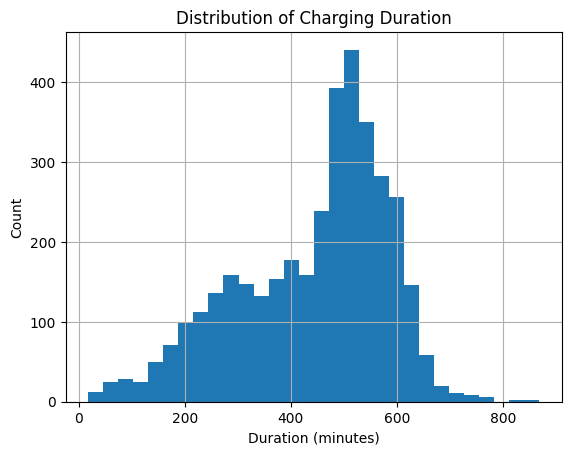

In [158]:
import matplotlib.pyplot as plt
data_with_weather['duration_minutes'].hist(bins=30)
plt.title('Distribution of Charging Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

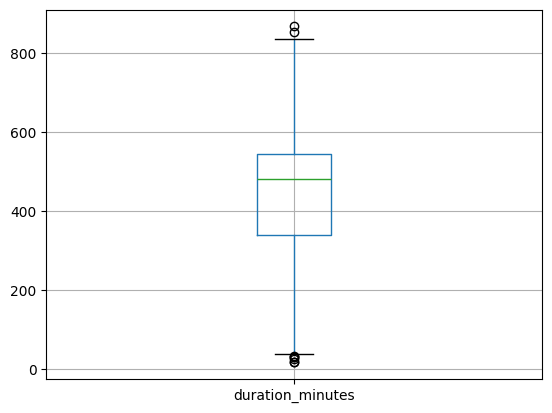

In [159]:
data_with_weather.boxplot(column='duration_minutes')
plt.show()


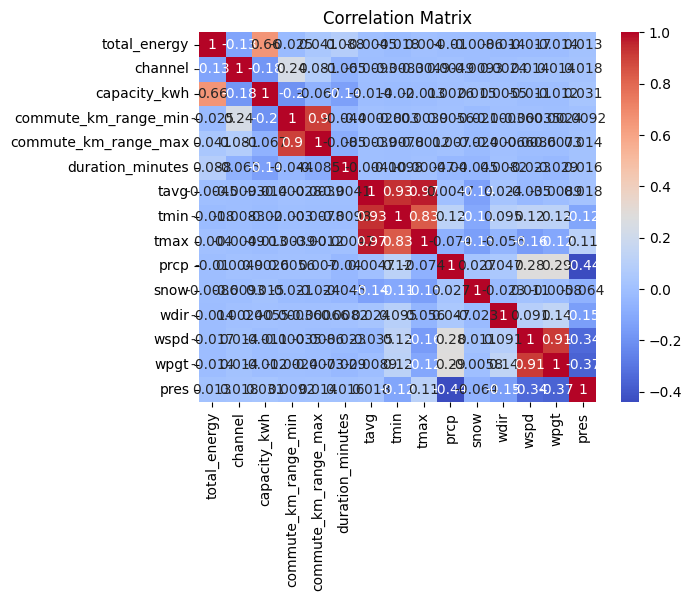

In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

# Only keep numeric columns for correlation
numeric_data = data_with_weather.select_dtypes(include=['int64', 'float64'])

# Now compute correlation
corr = numeric_data.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


capacity_kwh            0.143100
total_energy            0.088344
commute_km_range_max    0.085345
channel                 0.064857
snow                    0.045088
commute_km_range_min    0.043753
prcp                    0.039979
wpgt                    0.029109
wspd                    0.023204
pres                    0.015927
Name: duration_minutes, dtype: float64


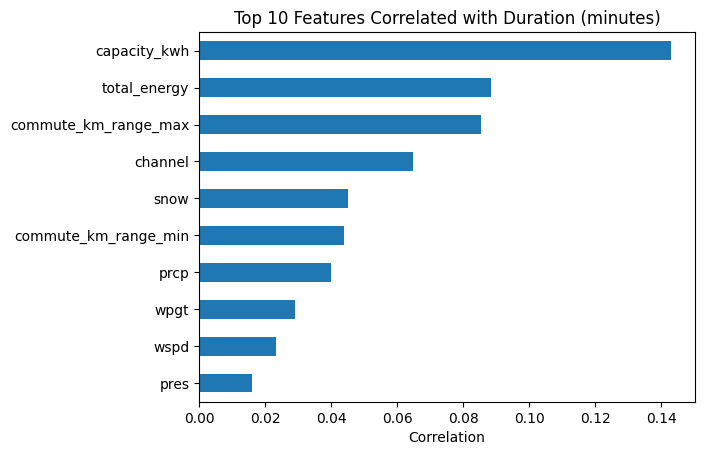

In [161]:
# 1. Select only numeric columns
numeric_data = data_with_weather.select_dtypes(include=['int64', 'float64'])

# 2. Calculate the correlation matrix
corr = numeric_data.corr()

# 3. Extract correlations with 'duration_minutes'
target_corr = corr['duration_minutes'].drop('duration_minutes')  # Drop self-correlation (1.0)

# 4. Get Top 10 features by absolute correlation
top10_corr = target_corr.abs().sort_values(ascending=False).head(10)

# 5. Print the result
print(top10_corr)

# (Optional) 6. Plot it for visualization
import matplotlib.pyplot as plt

top10_corr.plot(kind='barh')
plt.title('Top 10 Features Correlated with Duration (minutes)')
plt.xlabel('Correlation')
plt.gca().invert_yaxis()
plt.show()


Feature	Correlation with duration_minutes	Meaning

* capacity_kwh	0.143	Bigger battery → longer charging time (logical!)
* total_energy	0.088	More energy delivered → longer session (also logical!)
* commute_km_range_max	0.085	People with longer max commutes might charge longer.

# MODEL TRAINING

# Linear Regression without weather data

In [162]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from scipy.stats import loguniform

# --- Custom RMSE metric ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# --- Load and clean data ---
data = data_no_weather.copy()
data = data[data["transaction_year"] > 2020]

# --- Time-aware splits ---
train = data[data["transaction_year"] < 2023]       # 2021–2022
val = data[data["transaction_year"] == 2023]        # 2023 (validation)
test = data[data["transaction_year"] == 2024]       # 2024 (final test)

# --- Define target and features ---
target = "duration_minutes"
drop_cols = ["EV_id_x", "start_datetime", "end_datetime", "transaction_date"]
features = [col for col in data.columns if col not in drop_cols + [target]]

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

# --- Feature types ---
numeric_features = X_train.select_dtypes(include=["int64", "float64", "int32"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object", "bool"]).columns.tolist()

# --- Preprocessing pipeline ---
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# --- Full pipeline with Ridge Regression (for tuning alpha) ---
pipeline = make_pipeline(
    preprocessor,
    Ridge()
)

# --- Hyperparameter space (log scale for alpha) ---
param_dist = {
    "ridge__alpha": loguniform(1e-3, 1e2)  # alpha from 0.001 to 100
}

# --- Random search setup ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=25,
    cv=cv,
    scoring=rmse_scorer,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# --- Fit model on training set with CV
search.fit(X_train, y_train)
best_model_linear = search.best_estimator_

# --- Evaluate on validation set (2023)
y_val_pred_linear = best_model_linear.predict(X_val)
mae_val_linear = mean_absolute_error(y_val, y_val_pred_linear)
rmse_val_linear = rmse(y_val, y_val_pred_linear)
r2_val_linear = r2_score(y_val, y_val_pred_linear)

# --- Final test set (2024)
y_test_pred_linear = best_model_linear.predict(X_test)
mae_test_linear = mean_absolute_error(y_test, y_test_pred_linear)
rmse_test_linear = rmse(y_test, y_test_pred_linear)
r2_test_linear = r2_score(y_test, y_test_pred_linear)

# --- Print results ---
print("📊 Ridge Regression with RandomizedSearchCV (Train=2021–2022 | Val=2023 | Test=2024)")
print(f"Best Parameters: {search.best_params_}")
print(f"Validation MAE  = {mae_val_linear:.2f} minutes")
print(f"Validation RMSE = {rmse_val_linear:.2f} minutes")
print(f"Validation R²   = {r2_val_linear:.3f}")

print("\n🎯 Evaluation on 2024 Test Set:")
print(f"Test MAE  = {mae_test_linear:.2f} minutes")
print(f"Test RMSE = {rmse_test_linear:.2f} minutes")
print(f"Test R²   = {r2_test_linear:.3f}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
📊 Ridge Regression with RandomizedSearchCV (Train=2021–2022 | Val=2023 | Test=2024)
Best Parameters: {'ridge__alpha': np.float64(56.69849511478853)}
Validation MAE  = 82.69 minutes
Validation RMSE = 107.90 minutes
Validation R²   = 0.425

🎯 Evaluation on 2024 Test Set:
Test MAE  = 81.14 minutes
Test RMSE = 106.32 minutes
Test R²   = 0.362


ERROR PATTERN VISUALIZATION (linear without weather)

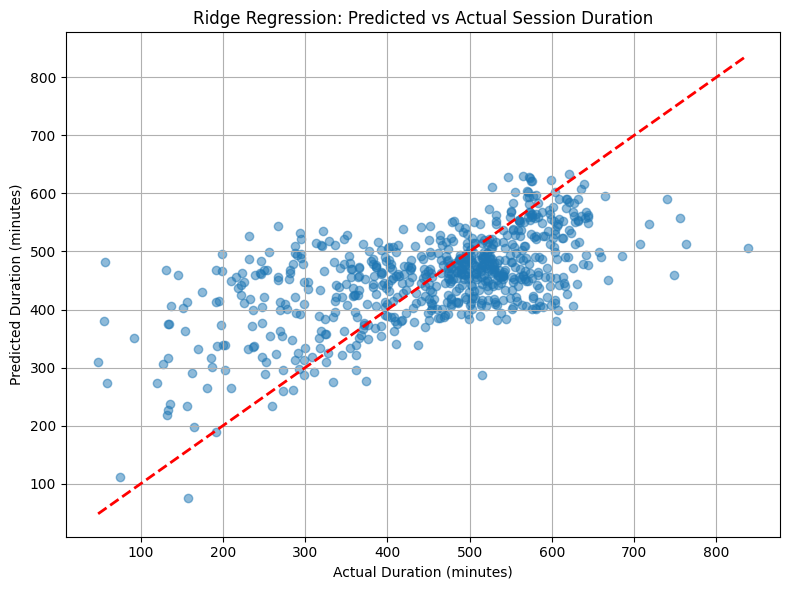

In [179]:
import matplotlib.pyplot as plt

# --- Create Error Pattern Visualization (Predicted vs Actual) ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred_linear, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Duration (minutes)')
plt.ylabel('Predicted Duration (minutes)')
plt.title('Ridge Regression: Predicted vs Actual Session Duration')
plt.grid(True)
plt.tight_layout()
plt.show()


# Linear Regression with weather data

In [163]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from scipy.stats import loguniform

# --- Custom RMSE metric ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# --- Load and clean data ---
data = data_with_weather.copy()
data = data[data["transaction_year"] > 2020]

# --- Time-aware splits ---
train = data[data["transaction_year"] < 2023]       # 2021–2022
val = data[data["transaction_year"] == 2023]        # 2023 (validation)
test = data[data["transaction_year"] == 2024]       # 2024 (final test)

# --- Define target and features ---
target = "duration_minutes"
drop_cols = ["EV_id_x", "start_datetime", "end_datetime", "transaction_date"]
features = [col for col in data.columns if col not in drop_cols + [target]]

X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

# --- Feature types ---
numeric_features = X_train.select_dtypes(include=["int64", "float64", "int32"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object", "bool"]).columns.tolist()

# --- Preprocessing pipeline ---
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# --- Full pipeline with Ridge Regression (for tuning alpha) ---
pipeline = make_pipeline(
    preprocessor,
    Ridge()
)

# --- Hyperparameter space (log scale for alpha) ---
param_dist = {
    "ridge__alpha": loguniform(1e-3, 1e2)  # alpha from 0.001 to 100
}

# --- Random search setup ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=25,
    cv=cv,
    scoring=rmse_scorer,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# --- Fit model on training set with CV
search.fit(X_train, y_train)
best_model_linear_weather = search.best_estimator_

# --- Evaluate on validation set (2023)
y_val_pred_linear_weather = best_model_linear_weather.predict(X_val)
mae_val_linear_weather = mean_absolute_error(y_val, y_val_pred_linear_weather)
rmse_val_linear_weather = rmse(y_val, y_val_pred_linear_weather)
r2_val_linear_weather = r2_score(y_val, y_val_pred_linear_weather)

# --- Final test set (2024)
y_test_pred_linear_weather = best_model_linear_weather.predict(X_test)
mae_test_linear_weather = mean_absolute_error(y_test, y_test_pred_linear_weather)
rmse_test_linear_weather = rmse(y_test, y_test_pred_linear_weather)
r2_test_linear_weather = r2_score(y_test, y_test_pred_linear_weather)

# --- Print results ---
print("📊 Ridge Regression with RandomizedSearchCV (Train=2021–2022 | Val=2023 | Test=2024)")
print(f"Best Parameters: {search.best_params_}")
print(f"Validation MAE  = {mae_val_linear_weather:.2f} minutes")
print(f"Validation RMSE = {rmse_val_linear_weather:.2f} minutes")
print(f"Validation R²   = {r2_val_linear_weather:.3f}")

print("\n🎯 Evaluation on 2024 Test Set:")
print(f"Test MAE  = {mae_test_linear_weather:.2f} minutes")
print(f"Test RMSE = {rmse_test_linear_weather:.2f} minutes")
print(f"Test R²   = {r2_test_linear_weather:.3f}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
📊 Ridge Regression with RandomizedSearchCV (Train=2021–2022 | Val=2023 | Test=2024)
Best Parameters: {'ridge__alpha': np.float64(56.69849511478853)}
Validation MAE  = 84.37 minutes
Validation RMSE = 109.00 minutes
Validation R²   = 0.413

🎯 Evaluation on 2024 Test Set:
Test MAE  = 82.61 minutes
Test RMSE = 107.36 minutes
Test R²   = 0.349


ERROR ANALYSIS with wd

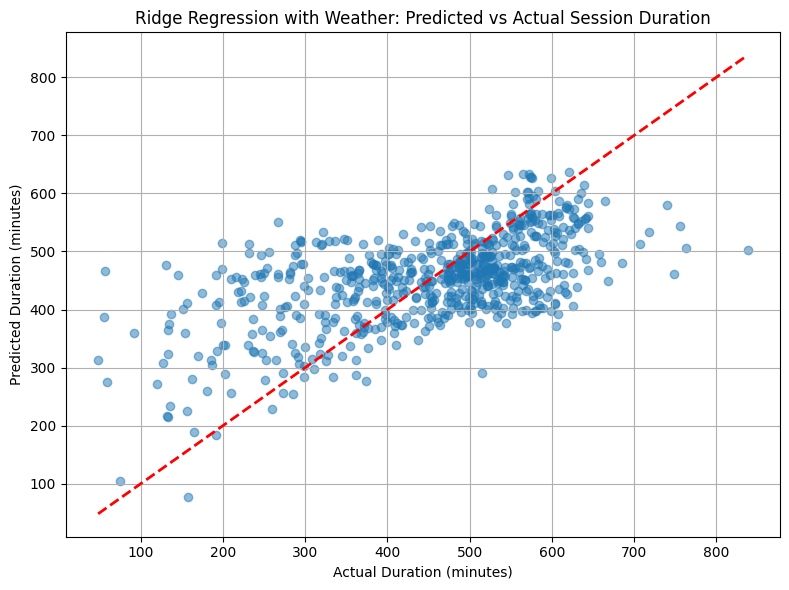

In [180]:
import matplotlib.pyplot as plt

# --- Create Error Pattern Visualization (Predicted vs Actual) for Ridge with weather ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred_linear_weather, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Duration (minutes)')
plt.ylabel('Predicted Duration (minutes)')
plt.title('Ridge Regression with Weather: Predicted vs Actual Session Duration')
plt.grid(True)
plt.tight_layout()
plt.show()


# Random forest without weather data

In [164]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from scipy.stats import randint

# --- Custom RMSE metric ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# --- Load and clean data ---
data = data_no_weather.copy()
data = data[data["transaction_year"] > 2020]

# --- Time-aware splits ---
train = data[data["transaction_year"] < 2023]
val = data[data["transaction_year"] == 2023]
test = data[data["transaction_year"] == 2024]

# --- Define target and features ---
target = "duration_minutes"
drop_cols = ["EV_id_x", "start_datetime", "end_datetime", "transaction_date"]
features = [col for col in data.columns if col not in drop_cols + [target]]

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

# --- Feature types ---
numeric_features = X_train.select_dtypes(include=["int64", "float64", "int32"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object", "bool"]).columns.tolist()

# --- Preprocessing pipeline ---
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# --- Full pipeline with Random Forest Regressor ---
pipeline = make_pipeline(
    preprocessor,
    RandomForestRegressor(random_state=42, n_jobs=-1)
)

# --- Hyperparameter space ---
param_dist = {
    "randomforestregressor__n_estimators": randint(100, 300),
    "randomforestregressor__max_depth": randint(5, 30),
    "randomforestregressor__min_samples_split": randint(2, 10),
    "randomforestregressor__min_samples_leaf": randint(1, 5),
    "randomforestregressor__max_features": ["sqrt", "log2", None]
}

# --- RandomizedSearchCV setup ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=25,
    cv=cv,
    scoring=rmse_scorer,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# --- Fit the model
search.fit(X_train, y_train)
best_model_rf = search.best_estimator_

# --- Evaluate on validation set
y_val_pred_rf = best_model_rf.predict(X_val)
mae_val_rf = mean_absolute_error(y_val, y_val_pred_rf)
rmse_val_rf = rmse(y_val, y_val_pred_rf)
r2_val_rf = r2_score(y_val, y_val_pred_rf)

# --- Evaluate on test set
y_test_pred_rf = best_model_rf.predict(X_test)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
rmse_test_rf = rmse(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# --- Print results ---
print("🌲 Random Forest with RandomizedSearchCV (Train=2021–2022 | Val=2023 | Test=2024)")
print(f"Best Parameters: {search.best_params_}")
print(f"Validation MAE  = {mae_val_rf:.2f} minutes")
print(f"Validation RMSE = {rmse_val_rf:.2f} minutes")
print(f"Validation R²   = {r2_val_rf:.3f}")

print("\n🎯 Evaluation on 2024 Test Set:")
print(f"Test MAE  = {mae_test_rf:.2f} minutes")
print(f"Test RMSE = {rmse_test_rf:.2f} minutes")
print(f"Test R²   = {r2_test_rf:.3f}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
🌲 Random Forest with RandomizedSearchCV (Train=2021–2022 | Val=2023 | Test=2024)
Best Parameters: {'randomforestregressor__max_depth': 12, 'randomforestregressor__max_features': None, 'randomforestregressor__min_samples_leaf': 3, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 222}
Validation MAE  = 85.82 minutes
Validation RMSE = 108.99 minutes
Validation R²   = 0.413

🎯 Evaluation on 2024 Test Set:
Test MAE  = 83.71 minutes
Test RMSE = 106.49 minutes
Test R²   = 0.360


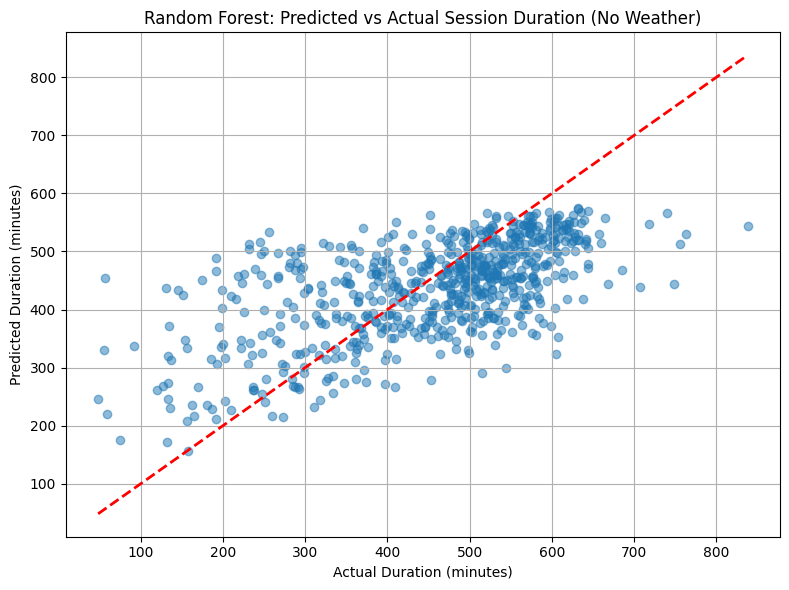

In [181]:
import matplotlib.pyplot as plt

# --- Create Error Pattern Visualization (Predicted vs Actual) for Random Forest without weather ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Duration (minutes)')
plt.ylabel('Predicted Duration (minutes)')
plt.title('Random Forest: Predicted vs Actual Session Duration (No Weather)')
plt.grid(True)
plt.tight_layout()
plt.show()


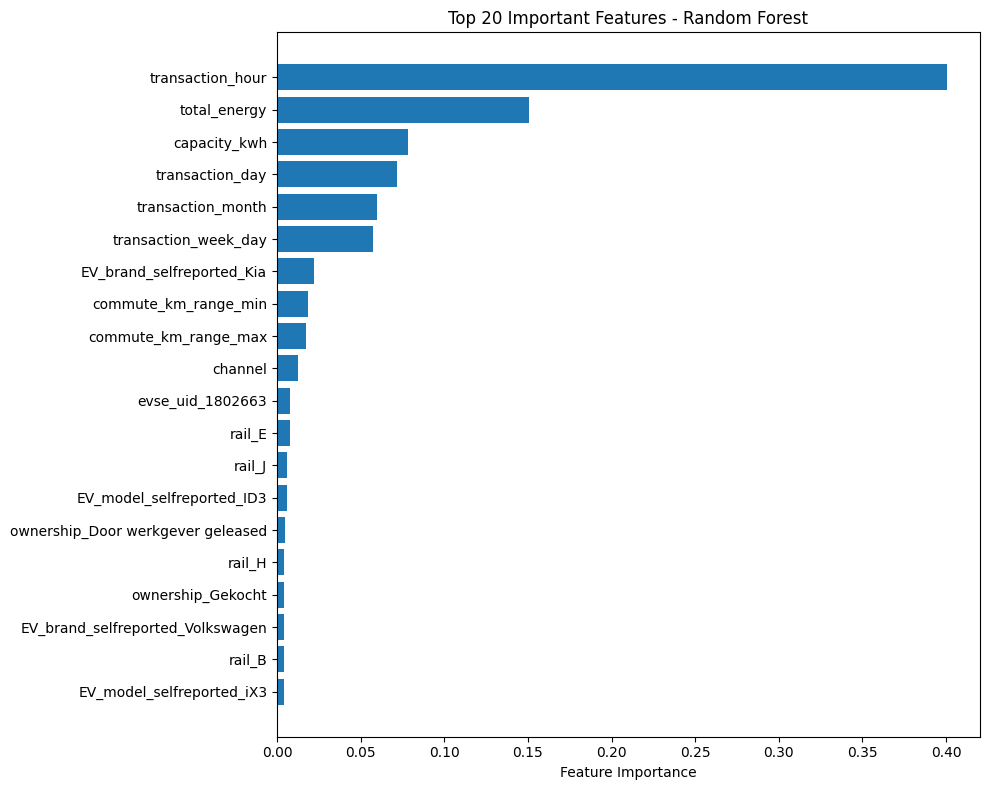

In [165]:
import matplotlib.pyplot as plt

# --- Extract feature names after preprocessing ---
# This handles the fact that one-hot encoded features become multiple columns
ohe = best_model_rf.named_steps['columntransformer'].named_transformers_['cat']
onehot_features = ohe.get_feature_names_out(categorical_features)

all_features = numeric_features + list(onehot_features)

# --- Extract feature importances ---
importances = best_model_rf.named_steps['randomforestregressor'].feature_importances_

# --- Create a sorted dataframe ---
feat_imp_df = pd.DataFrame({
    "feature": all_features,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# --- Plot the top features ---
plt.figure(figsize=(10, 8))
plt.barh(feat_imp_df['feature'][:20][::-1], feat_imp_df['importance'][:20][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features - Random Forest")
plt.tight_layout()
plt.show()


# Random forest with weather data

In [166]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from scipy.stats import randint

# --- Custom RMSE metric ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# --- Load and clean data ---
data = data_with_weather.copy()
data = data[data["transaction_year"] > 2020]

# --- Time-aware splits ---
train = data[data["transaction_year"] < 2023]
val = data[data["transaction_year"] == 2023]
test = data[data["transaction_year"] == 2024]

# --- Define target and features ---
target = "duration_minutes"
drop_cols = ["EV_id_x", "start_datetime", "end_datetime", "transaction_date"]
features = [col for col in data.columns if col not in drop_cols + [target]]

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

# --- Feature types ---
numeric_features = X_train.select_dtypes(include=["int64", "float64", "int32"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object", "bool"]).columns.tolist()

# --- Preprocessing pipeline ---
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# --- Full pipeline with Random Forest Regressor ---
pipeline = make_pipeline(
    preprocessor,
    RandomForestRegressor(random_state=42, n_jobs=-1)
)

# --- Hyperparameter space ---
param_dist = {
    "randomforestregressor__n_estimators": randint(100, 300),
    "randomforestregressor__max_depth": randint(5, 30),
    "randomforestregressor__min_samples_split": randint(2, 10),
    "randomforestregressor__min_samples_leaf": randint(1, 5),
    "randomforestregressor__max_features": ["sqrt", "log2", None]
}

# --- RandomizedSearchCV setup ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=25,
    cv=cv,
    scoring=rmse_scorer,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# --- Fit the model
search.fit(X_train, y_train)
best_model_rf_weather = search.best_estimator_

# --- Evaluate on validation set
y_val_pred_rf_weather = best_model_rf_weather.predict(X_val)
mae_val_rf_weather = mean_absolute_error(y_val, y_val_pred_rf_weather)
rmse_val_rf_weather = rmse(y_val, y_val_pred_rf_weather)
r2_val_rf_weather = r2_score(y_val, y_val_pred_rf_weather)

# --- Evaluate on test set
y_test_pred_rf_weather = best_model_rf_weather.predict(X_test)
mae_test_rf_weather = mean_absolute_error(y_test, y_test_pred_rf_weather)
rmse_test_rf_weather = rmse(y_test, y_test_pred_rf_weather)
r2_test_rf_weather = r2_score(y_test, y_test_pred_rf_weather)

# --- Print results ---
print("🌲 Random Forest with RandomizedSearchCV (Train=2021–2022 | Val=2023 | Test=2024)")
print(f"Best Parameters: {search.best_params_}")
print(f"Validation MAE  = {mae_val_rf_weather:.2f} minutes")
print(f"Validation RMSE = {rmse_val_rf_weather:.2f} minutes")
print(f"Validation R²   = {r2_val_rf_weather:.3f}")

print("\n🎯 Evaluation on 2024 Test Set:")
print(f"Test MAE  = {mae_test_rf_weather:.2f} minutes")
print(f"Test RMSE = {rmse_test_rf_weather:.2f} minutes")
print(f"Test R²   = {r2_test_rf_weather:.3f}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
🌲 Random Forest with RandomizedSearchCV (Train=2021–2022 | Val=2023 | Test=2024)
Best Parameters: {'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': None, 'randomforestregressor__min_samples_leaf': 4, 'randomforestregressor__min_samples_split': 7, 'randomforestregressor__n_estimators': 289}
Validation MAE  = 86.67 minutes
Validation RMSE = 109.46 minutes
Validation R²   = 0.408

🎯 Evaluation on 2024 Test Set:
Test MAE  = 82.95 minutes
Test RMSE = 105.46 minutes
Test R²   = 0.372


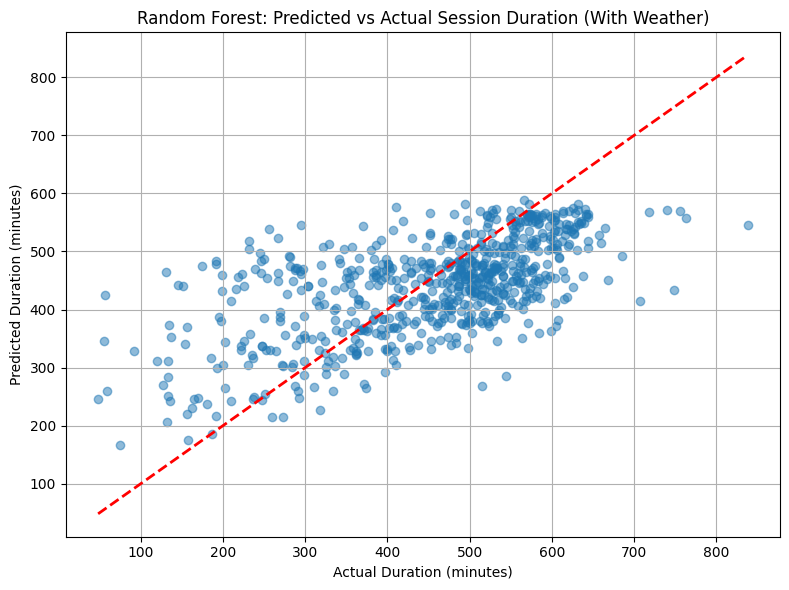

In [182]:
import matplotlib.pyplot as plt

# --- Create Error Pattern Visualization (Predicted vs Actual) for Random Forest with weather ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred_rf_weather, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Duration (minutes)')
plt.ylabel('Predicted Duration (minutes)')
plt.title('Random Forest: Predicted vs Actual Session Duration (With Weather)')
plt.grid(True)
plt.tight_layout()
plt.show()


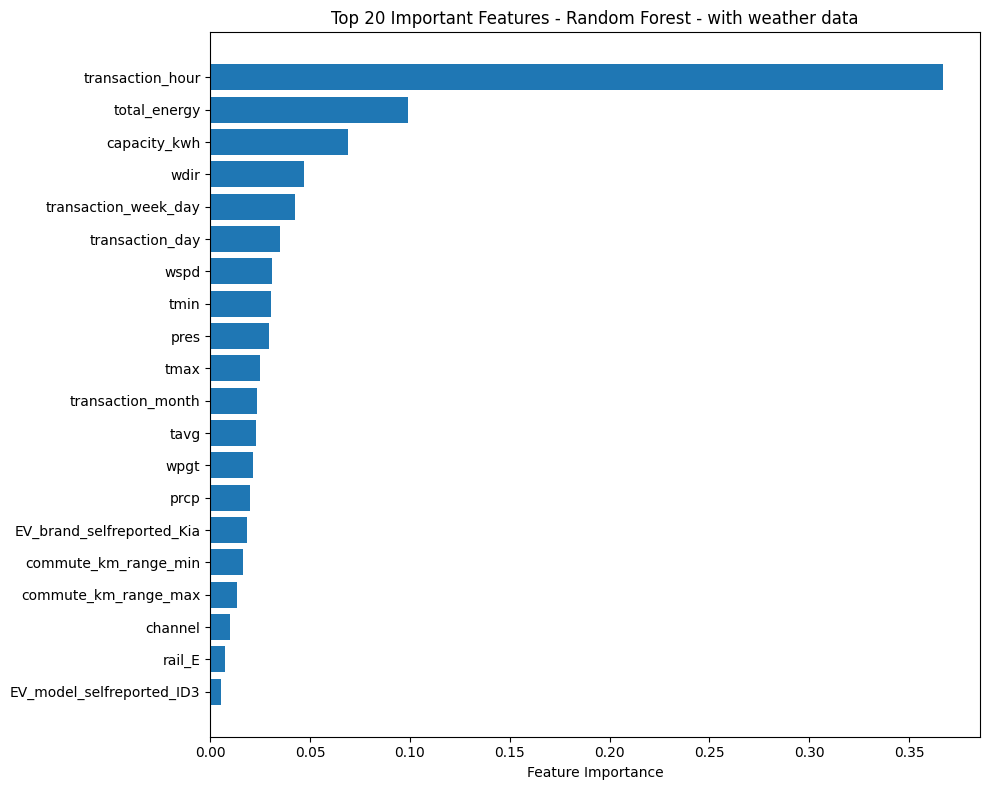

In [167]:
import matplotlib.pyplot as plt

# --- Extract feature names after preprocessing ---
# This handles the fact that one-hot encoded features become multiple columns
ohe = best_model_rf_weather.named_steps['columntransformer'].named_transformers_['cat']
onehot_features = ohe.get_feature_names_out(categorical_features)

all_features = numeric_features + list(onehot_features)

# --- Extract feature importances ---
importances = best_model_rf_weather.named_steps['randomforestregressor'].feature_importances_

# --- Create a sorted dataframe ---
feat_imp_df = pd.DataFrame({
    "feature": all_features,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# --- Plot the top features ---
plt.figure(figsize=(10, 8))
plt.barh(feat_imp_df['feature'][:20][::-1], feat_imp_df['importance'][:20][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features - Random Forest - with weather data")
plt.tight_layout()
plt.show()

# SVM without weather data

In [168]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from scipy.stats import uniform

# --- Custom RMSE metric ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# --- Load and clean data ---
data = data_no_weather.copy()
data = data[data["transaction_year"] > 2020]

# --- Time-aware splits ---
train = data[data["transaction_year"] < 2023]
val = data[data["transaction_year"] == 2023]
test = data[data["transaction_year"] == 2024]

# --- Define target and features ---
target = "duration_minutes"
drop_cols = ["EV_id_x", "start_datetime", "end_datetime", "transaction_date"]
features = [col for col in data.columns if col not in drop_cols + [target]]

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

# --- Feature types ---
numeric_features = X_train.select_dtypes(include=["int64", "float64", "int32"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object", "bool"]).columns.tolist()

# --- Preprocessing pipeline ---
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# --- Full pipeline with SVR ---
pipeline = make_pipeline(
    preprocessor,
    SVR()
)

# --- Hyperparameter space for SVR ---
param_dist = {
    "svr__C": uniform(0.1, 10),           # Penalty parameter
    "svr__epsilon": uniform(0.01, 1),     # Epsilon-insensitive loss
    "svr__kernel": ["linear", "rbf", "poly"],
    "svr__degree": [2, 3, 4],             # Only used if kernel="poly"
    "svr__gamma": ["scale", "auto"]       # Kernel coefficient
}

# --- RandomizedSearchCV setup ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=25,
    cv=cv,
    scoring=rmse_scorer,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# --- Fit the model
search.fit(X_train, y_train)
best_model_svr = search.best_estimator_

# --- Evaluate on validation set
y_val_pred_svr = best_model_svr.predict(X_val)
mae_val_svr = mean_absolute_error(y_val, y_val_pred_svr)
rmse_val_svr = rmse(y_val, y_val_pred_svr)
r2_val_svr = r2_score(y_val, y_val_pred_svr)

# --- Evaluate on test set
y_test_pred_svr = best_model_svr.predict(X_test)
mae_test_svr = mean_absolute_error(y_test, y_test_pred_svr)
rmse_test_svr = rmse(y_test, y_test_pred_svr)
r2_test_svr = r2_score(y_test, y_test_pred_svr)

# --- Print results ---
print("🌀 Support Vector Regression with RandomizedSearchCV (Train=2021–2022 | Val=2023 | Test=2024)")
print(f"Best Parameters: {search.best_params_}")
print(f"Validation MAE  = {mae_val_svr:.2f} minutes")
print(f"Validation RMSE = {rmse_val_svr:.2f} minutes")
print(f"Validation R²   = {r2_val_svr:.3f}")

print("\n🎯 Evaluation on 2024 Test Set:")
print(f"Test MAE  = {mae_test_svr:.2f} minutes")
print(f"Test RMSE = {rmse_test_svr:.2f} minutes")
print(f"Test R²   = {r2_test_svr:.3f}")


Fitting 5 folds for each of 25 candidates, totalling 125 fits
🌀 Support Vector Regression with RandomizedSearchCV (Train=2021–2022 | Val=2023 | Test=2024)
Best Parameters: {'svr__C': np.float64(1.0767211400638388), 'svr__degree': 4, 'svr__epsilon': np.float64(0.6932635188254582), 'svr__gamma': 'auto', 'svr__kernel': 'linear'}
Validation MAE  = 82.71 minutes
Validation RMSE = 119.00 minutes
Validation R²   = 0.300

🎯 Evaluation on 2024 Test Set:
Test MAE  = 92.39 minutes
Test RMSE = 127.24 minutes
Test R²   = 0.086


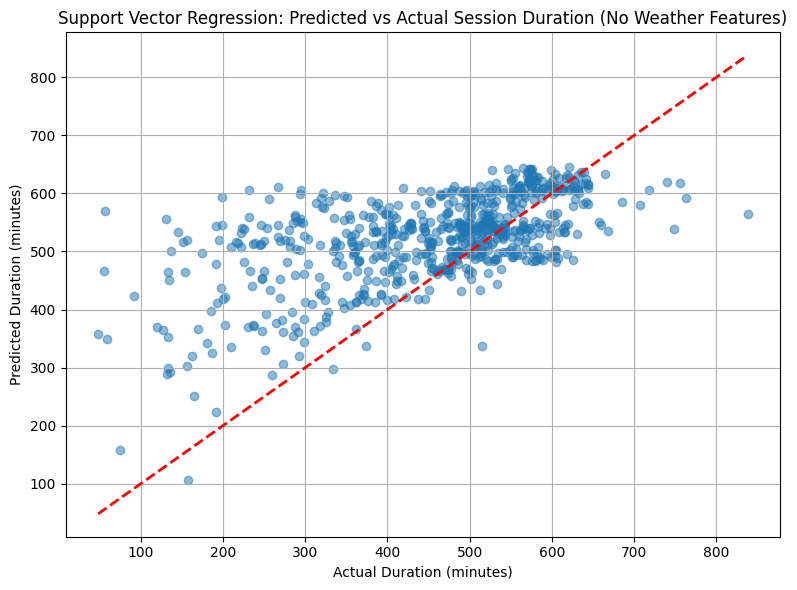

In [183]:
import matplotlib.pyplot as plt

# --- Error Pattern Plot: SVR without weather ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred_svr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Duration (minutes)')
plt.ylabel('Predicted Duration (minutes)')
plt.title('Support Vector Regression: Predicted vs Actual Session Duration (No Weather Features)')
plt.grid(True)
plt.tight_layout()
plt.show()


# SVR WITH WEATHER DATA

In [169]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from scipy.stats import uniform

# --- Custom RMSE metric ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# --- Load and FINAL data ---
data = data_with_weather.copy()
data = data[data["transaction_year"] > 2020]

# --- Time-aware splits ---
train = data[data["transaction_year"] < 2023]
val = data[data["transaction_year"] == 2023]
test = data[data["transaction_year"] == 2024]

# --- Define target and features ---
target = "duration_minutes"
drop_cols = ["EV_id_x", "start_datetime", "end_datetime", "transaction_date"]
features = [col for col in data.columns if col not in drop_cols + [target]]

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

# --- Feature types ---
numeric_features = X_train.select_dtypes(include=["int64", "float64", "int32"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object", "bool"]).columns.tolist()

# --- Preprocessing pipeline ---
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# --- Full pipeline with SVR ---
pipeline = make_pipeline(
    preprocessor,
    SVR()
)

# --- Hyperparameter space for SVR ---
param_dist = {
    "svr__C": uniform(0.1, 10),           # Penalty parameter
    "svr__epsilon": uniform(0.01, 1),     # Epsilon-insensitive loss
    "svr__kernel": ["linear", "rbf", "poly"],
    "svr__degree": [2, 3, 4],             # Only used if kernel="poly"
    "svr__gamma": ["scale", "auto"]       # Kernel coefficient
}

# --- RandomizedSearchCV setup ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=25,
    cv=cv,
    scoring=rmse_scorer,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# --- Fit the model
search.fit(X_train, y_train)
best_model_svr_weather = search.best_estimator_

# --- Evaluate on validation set
y_val_pred_svr_weather = best_model_svr_weather.predict(X_val)
mae_val_svr_weather = mean_absolute_error(y_val, y_val_pred_svr_weather)
rmse_val_svr_weather = rmse(y_val, y_val_pred_svr_weather)
r2_val_svr_weather = r2_score(y_val, y_val_pred_svr_weather)

# --- Evaluate on test set
y_test_pred_svr_weather = best_model_svr_weather.predict(X_test)
mae_test_svr_weather = mean_absolute_error(y_test, y_test_pred_svr_weather)
rmse_test_svr_weather = rmse(y_test, y_test_pred_svr_weather)
r2_test_svr_weather = r2_score(y_test, y_test_pred_svr_weather)

# --- Print results ---
print("🌀 Support Vector Regression with RandomizedSearchCV (Train=2021–2022 | Val=2023 | Test=2024)")
print(f"Best Parameters: {search.best_params_}")
print(f"Validation MAE  = {mae_val_svr_weather:.2f} minutes")
print(f"Validation RMSE = {rmse_val_svr_weather:.2f} minutes")
print(f"Validation R²   = {r2_val_svr_weather:.3f}")

print("\n🎯 Evaluation on 2024 Test Set:")
print(f"Test MAE  = {mae_test_svr_weather:.2f} minutes")
print(f"Test RMSE = {rmse_test_svr_weather:.2f} minutes")
print(f"Test R²   = {r2_test_svr_weather:.3f}")


Fitting 5 folds for each of 25 candidates, totalling 125 fits
🌀 Support Vector Regression with RandomizedSearchCV (Train=2021–2022 | Val=2023 | Test=2024)
Best Parameters: {'svr__C': np.float64(1.0767211400638388), 'svr__degree': 4, 'svr__epsilon': np.float64(0.6932635188254582), 'svr__gamma': 'auto', 'svr__kernel': 'linear'}
Validation MAE  = 81.59 minutes
Validation RMSE = 117.08 minutes
Validation R²   = 0.323

🎯 Evaluation on 2024 Test Set:
Test MAE  = 88.57 minutes
Test RMSE = 123.10 minutes
Test R²   = 0.144


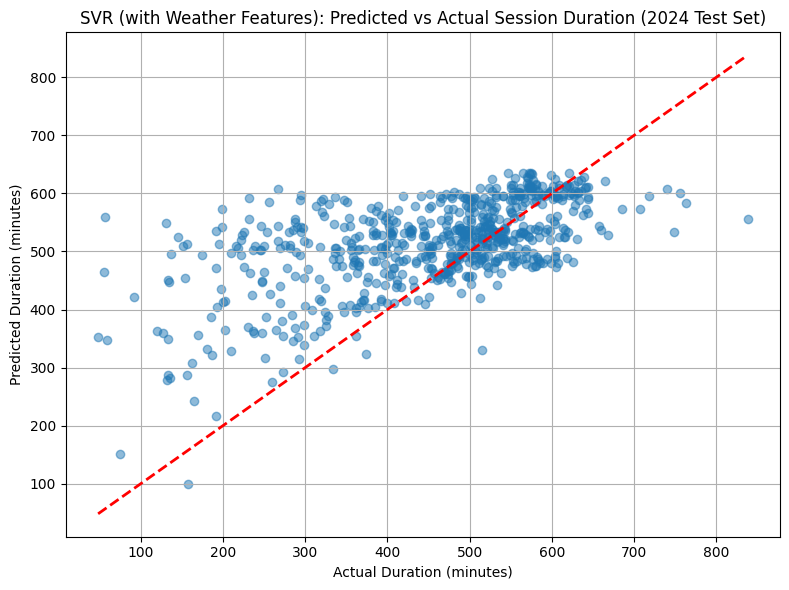

In [184]:
import matplotlib.pyplot as plt

# --- Error Pattern Plot: SVR with weather ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred_svr_weather, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Duration (minutes)')
plt.ylabel('Predicted Duration (minutes)')
plt.title('SVR (with Weather Features): Predicted vs Actual Session Duration (2024 Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()


# XGBOOST without weather data

In [170]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from scipy.stats import randint, uniform

# --- Custom RMSE metric ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# --- Load and clean data ---
data = data_no_weather.copy()
data = data[data["transaction_year"] > 2020]

# --- Time-aware splits ---
train = data[data["transaction_year"] < 2023]
val = data[data["transaction_year"] == 2023]
test = data[data["transaction_year"] == 2024]

# --- Define target and features ---
target = "duration_minutes"
drop_cols = ["EV_id_x", "start_datetime", "end_datetime", "transaction_date"]
features = [col for col in data.columns if col not in drop_cols + [target]]

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

# --- Feature types ---
numeric_features = X_train.select_dtypes(include=["int64", "float64", "int32"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object", "bool"]).columns.tolist()

# --- Preprocessing pipeline ---
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# --- Full pipeline with XGBoost Regressor ---
pipeline = make_pipeline(
    preprocessor,
    XGBRegressor(random_state=42, n_jobs=-1, verbosity=0)
)

# --- Hyperparameter space ---
param_dist = {
    "xgbregressor__n_estimators": randint(100, 300),
    "xgbregressor__max_depth": randint(3, 10),
    "xgbregressor__learning_rate": uniform(0.01, 0.3),
    "xgbregressor__subsample": uniform(0.5, 0.5),
    "xgbregressor__colsample_bytree": uniform(0.5, 0.5)
}

# --- Randomized search with cross-validation ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=25,
    cv=cv,
    scoring=rmse_scorer,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# --- Fit the model
search.fit(X_train, y_train)
best_model_xgb = search.best_estimator_

# --- Evaluate on validation set
y_val_pred_xgb = best_model_xgb.predict(X_val)
mae_val_xgb = mean_absolute_error(y_val, y_val_pred_xgb)
rmse_val_xgb = rmse(y_val, y_val_pred_xgb)
r2_val_xgb = r2_score(y_val, y_val_pred_xgb)

# --- Evaluate on test set
y_test_pred_xgb = best_model_xgb.predict(X_test)
mae_test_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
rmse_test_xgb = rmse(y_test, y_test_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

# --- Print results ---
print("⚡ XGBoost Regressor with RandomizedSearchCV (Train=2021–2022 | Val=2023 | Test=2024)")
print(f"Best Parameters: {search.best_params_}")
print(f"Validation MAE  = {mae_val_xgb:.2f} minutes")
print(f"Validation RMSE = {rmse_val_xgb:.2f} minutes")
print(f"Validation R²   = {r2_val_xgb:.3f}")

print("\n🎯 Evaluation on 2024 Test Set:")
print(f"Test MAE  = {mae_test_xgb:.2f} minutes")
print(f"Test RMSE = {rmse_test_xgb:.2f} minutes")
print(f"Test R²   = {r2_test_xgb:.3f}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
⚡ XGBoost Regressor with RandomizedSearchCV (Train=2021–2022 | Val=2023 | Test=2024)
Best Parameters: {'xgbregressor__colsample_bytree': np.float64(0.6481367528520412), 'xgbregressor__learning_rate': np.float64(0.05958008171890075), 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 170, 'xgbregressor__subsample': np.float64(0.7117007403531848)}
Validation MAE  = 88.62 minutes
Validation RMSE = 110.17 minutes
Validation R²   = 0.400

🎯 Evaluation on 2024 Test Set:
Test MAE  = 86.48 minutes
Test RMSE = 108.80 minutes
Test R²   = 0.332


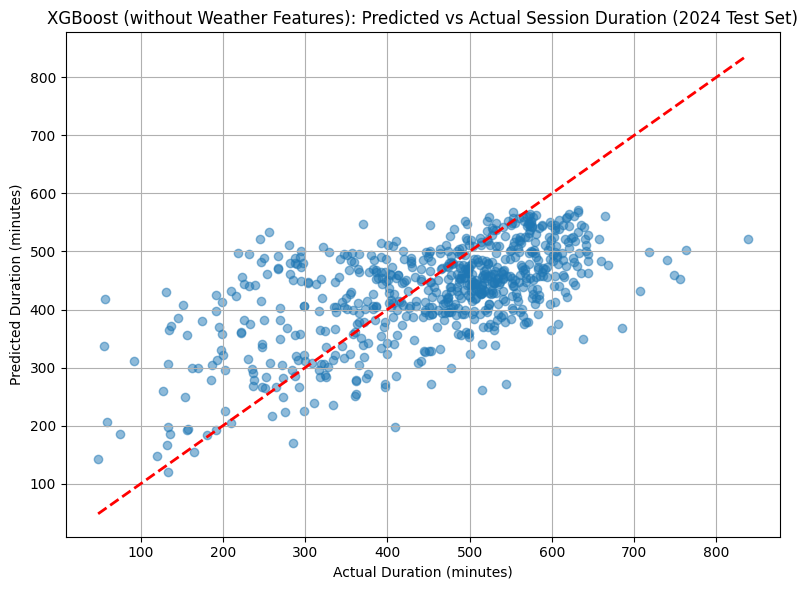

In [185]:
import matplotlib.pyplot as plt

# --- Error Pattern Plot: XGBoost without weather ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Duration (minutes)')
plt.ylabel('Predicted Duration (minutes)')
plt.title('XGBoost (without Weather Features): Predicted vs Actual Session Duration (2024 Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()


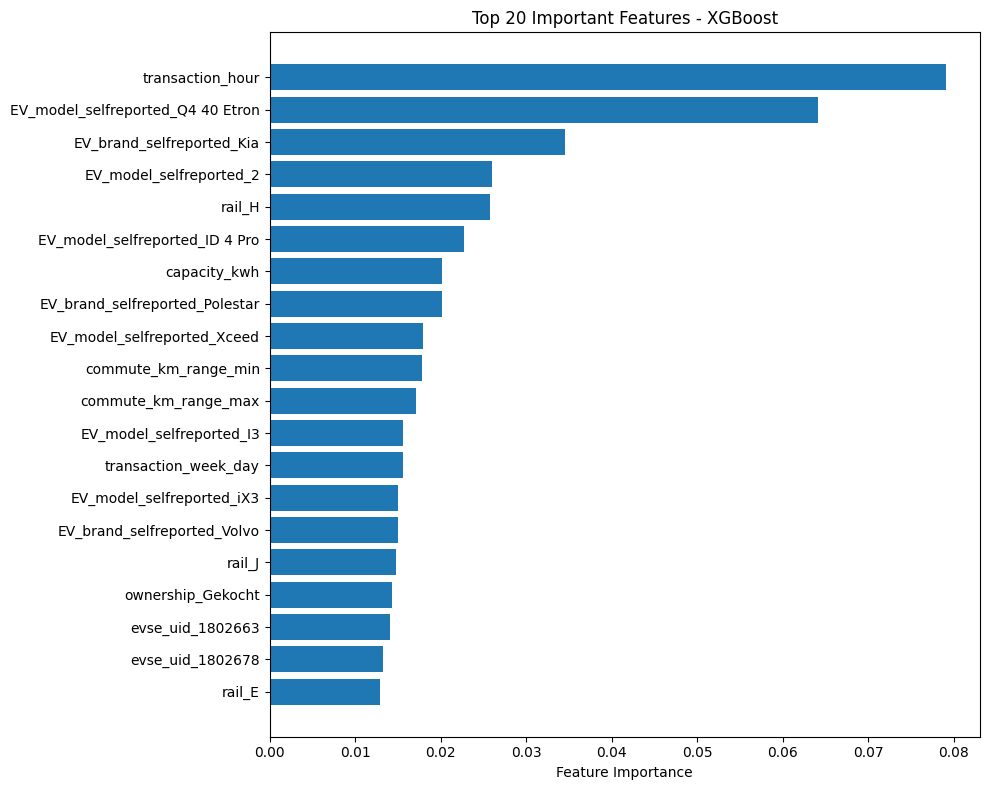

In [171]:
import matplotlib.pyplot as plt

# --- Get the trained XGBRegressor from the pipeline
xgb_model = best_model_xgb.named_steps['xgbregressor']

# --- Get feature names after preprocessing
# numeric features are scaled, categorical are one-hot encoded
onehot_categories = best_model_xgb.named_steps['columntransformer'].transformers_[1][1].categories_

categorical_expanded = []
for cat_list, orig_name in zip(onehot_categories, categorical_features):
    categorical_expanded.extend([f"{orig_name}_{cat}" for cat in cat_list])

final_feature_names = numeric_features + categorical_expanded

# --- Plot top 20 important features
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[-20:]  # top 20 features

plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [final_feature_names[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features - XGBoost")
plt.tight_layout()
plt.show()


# XGBOOST with weather data

In [172]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from scipy.stats import randint, uniform

# --- Custom RMSE metric ---
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

# --- Load and clean data ---
data = data_with_weather.copy()
data = data[data["transaction_year"] > 2020]

# --- Time-aware splits ---
train = data[data["transaction_year"] < 2023]
val = data[data["transaction_year"] == 2023]
test = data[data["transaction_year"] == 2024]

# --- Define target and features ---
target = "duration_minutes"
drop_cols = ["EV_id_x", "start_datetime", "end_datetime", "transaction_date"]
features = [col for col in data.columns if col not in drop_cols + [target]]

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

# --- Feature types ---
numeric_features = X_train.select_dtypes(include=["int64", "float64", "int32"]).columns.tolist()
categorical_features = X_train.select_dtypes(include=["object", "bool"]).columns.tolist()

# --- Preprocessing pipeline ---
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_features),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
])

# --- Full pipeline with XGBoost Regressor ---
pipeline = make_pipeline(
    preprocessor,
    XGBRegressor(random_state=42, n_jobs=-1, verbosity=0)
)

# --- Hyperparameter space ---
param_dist = {
    "xgbregressor__n_estimators": randint(100, 300),
    "xgbregressor__max_depth": randint(3, 10),
    "xgbregressor__learning_rate": uniform(0.01, 0.3),
    "xgbregressor__subsample": uniform(0.5, 0.5),
    "xgbregressor__colsample_bytree": uniform(0.5, 0.5)
}

# --- Randomized search with cross-validation ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=25,
    cv=cv,
    scoring=rmse_scorer,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

# --- Fit the model
search.fit(X_train, y_train)
best_model_xgb_weather = search.best_estimator_

# --- Evaluate on validation set
y_val_pred_xgb_weather = best_model_xgb_weather.predict(X_val)
mae_val_xgb_weather = mean_absolute_error(y_val, y_val_pred_xgb_weather)
rmse_val_xgb_weather = rmse(y_val, y_val_pred_xgb_weather)
r2_val_xgb_weather = r2_score(y_val, y_val_pred_xgb_weather)

# --- Evaluate on test set
y_test_pred_xgb_weather = best_model_xgb_weather.predict(X_test)
mae_test_xgb_weather = mean_absolute_error(y_test, y_test_pred_xgb_weather)
rmse_test_xgb_weather = rmse(y_test, y_test_pred_xgb_weather)
r2_test_xgb_weather = r2_score(y_test, y_test_pred_xgb_weather)

# --- Print results ---
print("⚡ XGBoost Regressor with RandomizedSearchCV (Train=2021–2022 | Val=2023 | Test=2024)")
print(f"Best Parameters: {search.best_params_}")
print(f"Validation MAE  = {mae_val_xgb_weather:.2f} minutes")
print(f"Validation RMSE = {rmse_val_xgb_weather:.2f} minutes")
print(f"Validation R²   = {r2_val_xgb_weather:.3f}")

print("\n🎯 Evaluation on 2024 Test Set:")
print(f"Test MAE  = {mae_test_xgb_weather:.2f} minutes")
print(f"Test RMSE = {rmse_test_xgb_weather:.2f} minutes")
print(f"Test R²   = {r2_test_xgb_weather:.3f}")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
⚡ XGBoost Regressor with RandomizedSearchCV (Train=2021–2022 | Val=2023 | Test=2024)
Best Parameters: {'xgbregressor__colsample_bytree': np.float64(0.6481367528520412), 'xgbregressor__learning_rate': np.float64(0.05958008171890075), 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 170, 'xgbregressor__subsample': np.float64(0.7117007403531848)}
Validation MAE  = 87.69 minutes
Validation RMSE = 108.98 minutes
Validation R²   = 0.413

🎯 Evaluation on 2024 Test Set:
Test MAE  = 84.47 minutes
Test RMSE = 105.56 minutes
Test R²   = 0.371


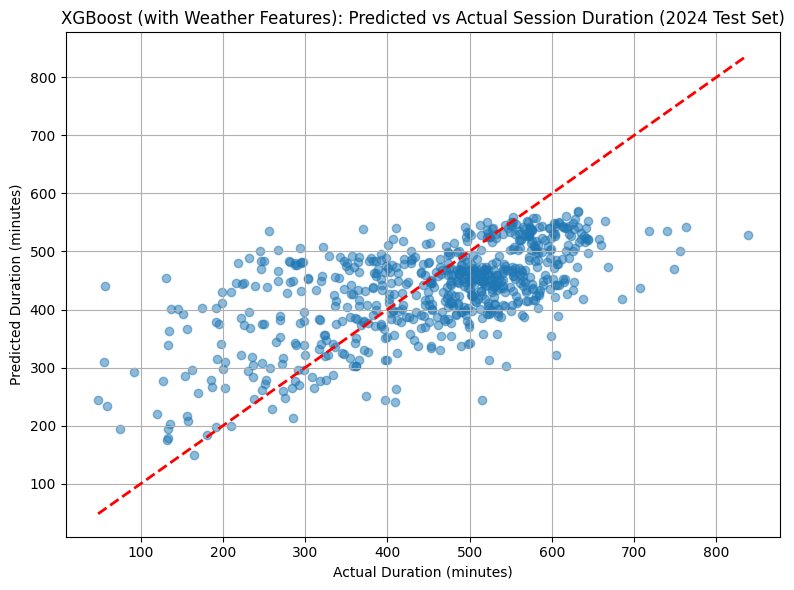

In [186]:
import matplotlib.pyplot as plt

# --- Error Pattern Plot: XGBoost with weather ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred_xgb_weather, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Duration (minutes)')
plt.ylabel('Predicted Duration (minutes)')
plt.title('XGBoost (with Weather Features): Predicted vs Actual Session Duration (2024 Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()


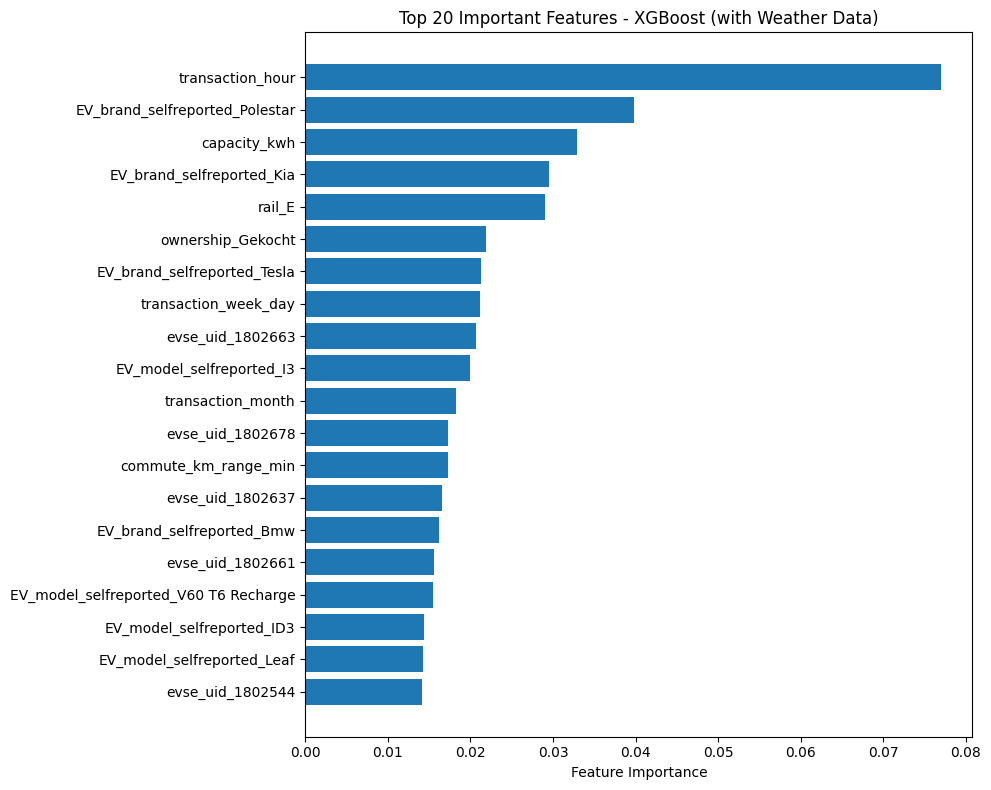

In [173]:
import matplotlib.pyplot as plt

# --- Get the trained XGBRegressor from the pipeline
xgb_model_weather = best_model_xgb_weather.named_steps['xgbregressor']

# --- Get feature names after preprocessing
onehot_categories_weather = best_model_xgb_weather.named_steps['columntransformer'].transformers_[1][1].categories_

categorical_expanded_weather = []
for cat_list, orig_name in zip(onehot_categories_weather, categorical_features):
    categorical_expanded_weather.extend([f"{orig_name}_{cat}" for cat in cat_list])

final_feature_names_weather = numeric_features + categorical_expanded_weather

# --- Plot top 20 important features
importances_weather = xgb_model_weather.feature_importances_
indices_weather = np.argsort(importances_weather)[-20:]  # top 20 features

plt.figure(figsize=(10, 8))
plt.barh(range(len(indices_weather)), importances_weather[indices_weather], align="center")
plt.yticks(range(len(indices_weather)), [final_feature_names_weather[i] for i in indices_weather])
plt.xlabel("Feature Importance")
plt.title("Top 20 Important Features - XGBoost (with Weather Data)")
plt.tight_layout()
plt.show()


# Voting ensembe with weather

In [174]:
from sklearn.ensemble import VotingRegressor

# --- Voting ensemble from best tuned models ---
voting_model = make_pipeline(
    preprocessor,
    VotingRegressor(estimators=[
        ('ridge', best_model_linear_weather.named_steps['ridge']),
        ('rf', best_model_rf_weather.named_steps['randomforestregressor']),
        ('xgb', best_model_xgb_weather.named_steps['xgbregressor'])
    ])
)

# --- Fit on training set
voting_model.fit(X_train, y_train)

# --- Validation performance
y_val_pred_voting = voting_model.predict(X_val)
mae_val_voting = mean_absolute_error(y_val, y_val_pred_voting)
rmse_val_voting = rmse(y_val, y_val_pred_voting)
r2_val_voting = r2_score(y_val, y_val_pred_voting)

# --- Test performance
y_test_pred_voting = voting_model.predict(X_test)
mae_test_voting = mean_absolute_error(y_test, y_test_pred_voting)
rmse_test_voting = rmse(y_test, y_test_pred_voting)
r2_test_voting = r2_score(y_test, y_test_pred_voting)

print("🤝 Voting Regressor (Ridge + Random Forest + XGBoost) (Train=2021–2022 | Val=2023 | Test=2024)")

print(f"Validation MAE  = {mae_val_voting:.2f} minutes")
print(f"Validation RMSE = {rmse_val_voting:.2f} minutes")
print(f"Validation R²   = {r2_val_voting:.3f}")

print("\n🎯 Evaluation on 2024 Test Set:")
print(f"Test MAE  = {mae_test_voting:.2f} minutes")
print(f"Test RMSE = {rmse_test_voting:.2f} minutes")
print(f"Test R²   = {r2_test_voting:.3f}")

🤝 Voting Regressor (Ridge + Random Forest + XGBoost) (Train=2021–2022 | Val=2023 | Test=2024)
Validation MAE  = 84.58 minutes
Validation RMSE = 106.85 minutes
Validation R²   = 0.436

🎯 Evaluation on 2024 Test Set:
Test MAE  = 80.92 minutes
Test RMSE = 103.51 minutes
Test R²   = 0.395


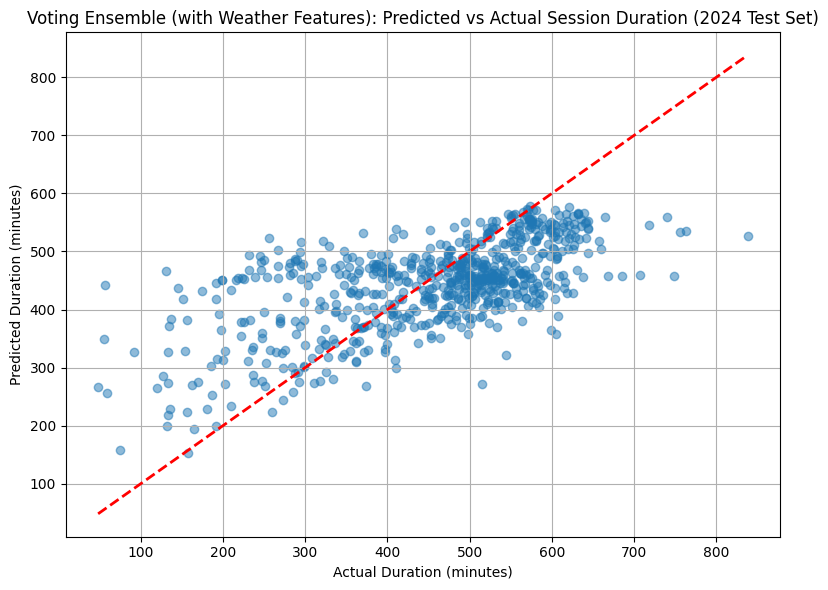

In [187]:
import matplotlib.pyplot as plt

# --- Error Pattern Plot: Voting Ensemble (with Weather) ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred_voting, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Duration (minutes)')
plt.ylabel('Predicted Duration (minutes)')
plt.title('Voting Ensemble (with Weather Features): Predicted vs Actual Session Duration (2024 Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Stacking ensemble  with weather


In [175]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

# --- Define base learners ---
base_learners = [
    ('ridge', best_model_linear_weather.named_steps['ridge']),
    ('rf', best_model_rf_weather.named_steps['randomforestregressor']),
    ('xgb', best_model_xgb_weather.named_steps['xgbregressor'])
]

# --- Meta-learner (you can also use SVR or XGBoost here, but RidgeCV is fast + stable)
meta_learner = RidgeCV()

# --- Stacking Regressor inside full pipeline ---
stacking_model = make_pipeline(
    preprocessor,
    StackingRegressor(estimators=base_learners, final_estimator=meta_learner, n_jobs=-1, passthrough=False)
)

# --- Fit stacking model on training data ---
stacking_model.fit(X_train, y_train)

# --- Validation evaluation ---
y_val_pred_stack = stacking_model.predict(X_val)
mae_val_stack = mean_absolute_error(y_val, y_val_pred_stack)
rmse_val_stack = rmse(y_val, y_val_pred_stack)
r2_val_stack = r2_score(y_val, y_val_pred_stack)

# --- Test evaluation ---
y_test_pred_stack = stacking_model.predict(X_test)
mae_test_stack = mean_absolute_error(y_test, y_test_pred_stack)
rmse_test_stack = rmse(y_test, y_test_pred_stack)
r2_test_stack = r2_score(y_test, y_test_pred_stack)

# --- Print results like a boss ---
print("🧱 Stacking Regressor (Ridge + RF + XGBoost → RidgeCV) (Train=2021–2022 | Val=2023 | Test=2024)")
print(f"Validation MAE  = {mae_val_stack:.2f} minutes")
print(f"Validation RMSE = {rmse_val_stack:.2f} minutes")
print(f"Validation R²   = {r2_val_stack:.3f}")

print("\n🎯 Evaluation on 2024 Test Set:")
print(f"Test MAE  = {mae_test_stack:.2f} minutes")
print(f"Test RMSE = {rmse_test_stack:.2f} minutes")
print(f"Test R²   = {r2_test_stack:.3f}")

🧱 Stacking Regressor (Ridge + RF + XGBoost → RidgeCV) (Train=2021–2022 | Val=2023 | Test=2024)
Validation MAE  = 83.25 minutes
Validation RMSE = 106.44 minutes
Validation R²   = 0.440

🎯 Evaluation on 2024 Test Set:
Test MAE  = 80.09 minutes
Test RMSE = 103.54 minutes
Test R²   = 0.395


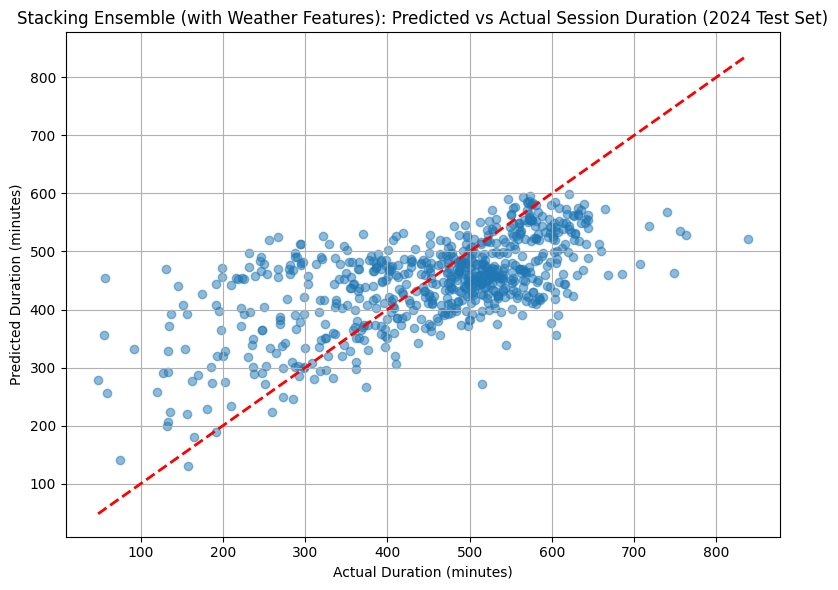

In [188]:
import matplotlib.pyplot as plt

# --- Error Pattern Plot: Stacking Ensemble (with Weather) ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred_stack, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Duration (minutes)')
plt.ylabel('Predicted Duration (minutes)')
plt.title('Stacking Ensemble (with Weather Features): Predicted vs Actual Session Duration (2024 Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Voting ensembe without weather

In [176]:
from sklearn.ensemble import VotingRegressor

# --- Voting ensemble from best tuned models ---
voting_model = make_pipeline(
    preprocessor,
    VotingRegressor(estimators=[
        ('ridge', best_model_linear.named_steps['ridge']),
        ('rf', best_model_rf.named_steps['randomforestregressor']),
        ('xgb', best_model_xgb.named_steps['xgbregressor'])
    ])
)

# --- Fit on training set
voting_model.fit(X_train, y_train)

# --- Validation performance
y_val_pred_voting = voting_model.predict(X_val)
mae_val_voting = mean_absolute_error(y_val, y_val_pred_voting)
rmse_val_voting = rmse(y_val, y_val_pred_voting)
r2_val_voting = r2_score(y_val, y_val_pred_voting)

# --- Test performance
y_test_pred_voting = voting_model.predict(X_test)
mae_test_voting = mean_absolute_error(y_test, y_test_pred_voting)
rmse_test_voting = rmse(y_test, y_test_pred_voting)
r2_test_voting = r2_score(y_test, y_test_pred_voting)

print("🤝 Voting Regressor (Ridge + Random Forest + XGBoost) (Train=2021–2022 | Val=2023 | Test=2024)")

print(f"Validation MAE  = {mae_val_voting:.2f} minutes")
print(f"Validation RMSE = {rmse_val_voting:.2f} minutes")
print(f"Validation R²   = {r2_val_voting:.3f}")

print("\n🎯 Evaluation on 2024 Test Set:")
print(f"Test MAE  = {mae_test_voting:.2f} minutes")
print(f"Test RMSE = {rmse_test_voting:.2f} minutes")
print(f"Test R²   = {r2_test_voting:.3f}")

🤝 Voting Regressor (Ridge + Random Forest + XGBoost) (Train=2021–2022 | Val=2023 | Test=2024)
Validation MAE  = 84.56 minutes
Validation RMSE = 106.83 minutes
Validation R²   = 0.436

🎯 Evaluation on 2024 Test Set:
Test MAE  = 80.84 minutes
Test RMSE = 103.47 minutes
Test R²   = 0.395


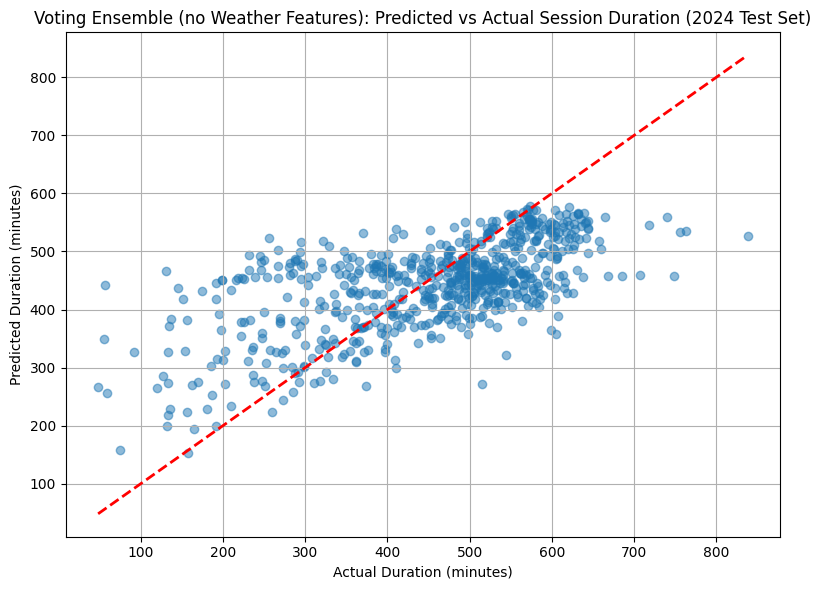

In [189]:
import matplotlib.pyplot as plt

# --- Error Pattern Plot: Voting Ensemble (no weather features) ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred_voting, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Duration (minutes)')
plt.ylabel('Predicted Duration (minutes)')
plt.title('Voting Ensemble (no Weather Features): Predicted vs Actual Session Duration (2024 Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Stacking ensemble  without weather

In [177]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

# --- Define base learners ---
base_learners = [
    ('ridge', best_model_linear.named_steps['ridge']),
    ('rf', best_model_rf.named_steps['randomforestregressor']),
    ('xgb', best_model_xgb.named_steps['xgbregressor'])
]

# --- Meta-learner (you can also use SVR or XGBoost here, but RidgeCV is fast + stable)
meta_learner = RidgeCV()

# --- Stacking Regressor inside full pipeline ---
stacking_model = make_pipeline(
    preprocessor,
    StackingRegressor(estimators=base_learners, final_estimator=meta_learner, n_jobs=-1, passthrough=False)
)

# --- Fit stacking model on training data ---
stacking_model.fit(X_train, y_train)

# --- Validation evaluation ---
y_val_pred_stack = stacking_model.predict(X_val)
mae_val_stack = mean_absolute_error(y_val, y_val_pred_stack)
rmse_val_stack = rmse(y_val, y_val_pred_stack)
r2_val_stack = r2_score(y_val, y_val_pred_stack)

# --- Test evaluation ---
y_test_pred_stack = stacking_model.predict(X_test)
mae_test_stack = mean_absolute_error(y_test, y_test_pred_stack)
rmse_test_stack = rmse(y_test, y_test_pred_stack)
r2_test_stack = r2_score(y_test, y_test_pred_stack)

# --- Print results like a boss ---
print("🧱 Stacking Regressor (Ridge + RF + XGBoost → RidgeCV) (Train=2021–2022 | Val=2023 | Test=2024)")
print(f"Validation MAE  = {mae_val_stack:.2f} minutes")
print(f"Validation RMSE = {rmse_val_stack:.2f} minutes")
print(f"Validation R²   = {r2_val_stack:.3f}")

print("\n🎯 Evaluation on 2024 Test Set:")
print(f"Test MAE  = {mae_test_stack:.2f} minutes")
print(f"Test RMSE = {rmse_test_stack:.2f} minutes")
print(f"Test R²   = {r2_test_stack:.3f}")

🧱 Stacking Regressor (Ridge + RF + XGBoost → RidgeCV) (Train=2021–2022 | Val=2023 | Test=2024)
Validation MAE  = 83.39 minutes
Validation RMSE = 106.54 minutes
Validation R²   = 0.439

🎯 Evaluation on 2024 Test Set:
Test MAE  = 80.29 minutes
Test RMSE = 103.66 minutes
Test R²   = 0.393


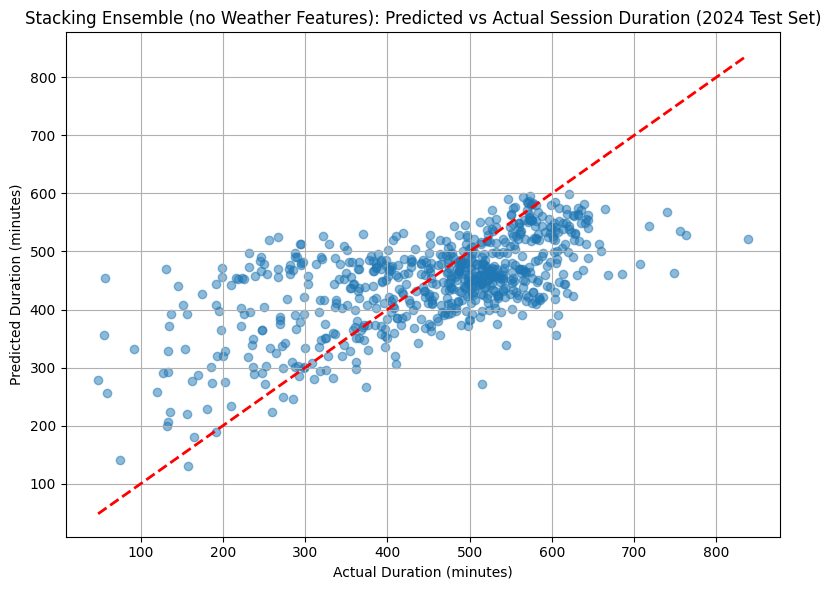

In [190]:
import matplotlib.pyplot as plt

# --- Error Pattern Plot: Stacking Ensemble (no weather features) ---
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred_stack, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Duration (minutes)')
plt.ylabel('Predicted Duration (minutes)')
plt.title('Stacking Ensemble (no Weather Features): Predicted vs Actual Session Duration (2024 Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [178]:
#